
# Exports

# Experiments:


- Without density

- With density

- With density + gdpcap

- With density + gdpcap + wto + contig

- With density + pci + gdpcap + wto + contig

- With density + pop 

In [1]:
%load_ext autotime
%matplotlib inline

time: 488 ms (started: 2023-07-07 16:34:43 +03:00)


In [2]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import re

time: 859 ms (started: 2023-07-07 16:34:43 +03:00)


In [3]:
data =  pd.read_csv('Data/SimpleApproach/Imports/Imports2018-19CumulativeGravityHSlevelComplexity.csv')
data.dropna(inplace=True)
data

,refYear,partnerCode,reporterCode,distw_harmonic,contig,gdp_d,gdp_o,gdpcap_d,gdpcap_o,pop_d,...,wto_d,wto_o,refMonth,cmdCode,primaryValue,previous_year_primaryvalue,2HScmdCode,4HScmdCode,pci,density
0,2018,4.0,24.0,7517.0,0.0,1.805323e+07,7.779294e+07,0.486,2.525,37171.921,...,1.0,1.0,9,845420,101822.101,101822.101,84,8454,2.020725,0.006744
1,2018,76.0,24.0,6398.0,0.0,1.916934e+09,7.779294e+07,9.151,2.525,209469.315,...,1.0,1.0,10,845420,203.596,409.456,84,8454,2.020725,0.006744
2,2018,156.0,24.0,11621.0,0.0,1.389482e+10,7.779294e+07,9.905,2.525,1402760.010,...,1.0,1.0,9,845420,995476.726,995476.726,84,8454,2.020725,0.006744
3,2018,410.0,24.0,12763.0,0.0,1.724846e+09,7.779294e+07,33.437,2.525,51585.056,...,1.0,1.0,3,845420,43823.359,43823.359,84,8454,2.020725,0.006744
4,2018,710.0,24.0,2517.0,0.0,4.048421e+08,7.779294e+07,7.005,2.525,57792.519,...,1.0,1.0,8,845420,9222.582,9222.582,84,8454,2.020725,0.006744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43120411,2019,458.0,352.0,11271.0,0.0,3.652764e+08,2.485774e+07,11.433,68.941,31949.789,...,1.0,1.0,8,846721,3629.278,74369.197,84,8467,2.672168,0.034830
43120412,2019,458.0,352.0,11271.0,0.0,3.652764e+08,2.485774e+07,11.433,68.941,31949.789,...,1.0,1.0,10,846721,11405.271,80117.198,84,8467,2.672168,0.034830
43120413,2019,484.0,352.0,7308.0,0.0,1.269404e+09,2.485774e+07,9.950,68.941,127575.531,...,1.0,1.0,1,846721,966.607,9502.791,84,8467,2.672168,0.034830
43120414,2019,484.0,352.0,7308.0,0.0,1.269404e+09,2.485774e+07,9.950,68.941,127575.531,...,1.0,1.0,2,846721,1010.410,8154.953,84,8467,2.672168,0.034830


time: 1min 54s (started: 2023-07-07 16:34:44 +03:00)


In [4]:
def MPE(Y_actual,Y_Predicted):
    mape = np.mean((Y_actual - Y_Predicted)/Y_actual)*100
    return mape

def MAPE(Y_actual,Y_Predicted):
    mpe = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mpe

data['primaryValue'] = data['primaryValue']/1000000
data['gdp_o'] = data['gdp_o']/1000000
data['gdp_d'] = data['gdp_d']/1000000
data['gdpcap_o'] = data['gdpcap_o']/1000000
data['gdpcap_d'] = data['gdpcap_d']/1000000
data['distw_harmonic'] = data['distw_harmonic']/1000

time: 1.06 s (started: 2023-07-07 16:36:39 +03:00)


## RF


In [5]:
X_test = data[data['refYear'] == 2019].sample(frac =.5)
y_test = X_test['primaryValue']
X_test = X_test[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode']]
print("X_val.shape: ", X_test.shape)

X_train = data[data['refYear'] != 2019]
# X_train = X_train[X_train['year'] != 2016] # just testing!
y_train = X_train['primaryValue']
X_train = X_train[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode']]
print("X_train.shape: ", X_train.shape)

# X = data[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode']]
# y = data['primaryValue']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
# del X, y


# RF
reg = model = RandomForestRegressor(min_samples_split=10, n_estimators=25, n_jobs=-1, random_state=0, oob_score=True,criterion='poisson', max_depth=17, verbose=2, max_features = 0.7)
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


r2_train = reg.score(X_train, y_train)
r2_val = reg.score(X_test, y_test)
print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2_val.round(2))
oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_val, y_pred)
adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print("Mean Squared Error:", mse.round(2))
print("Mean Absolute Error:", mae.round(2))
# print("R^2 Score:", r2.round(2))
print("Adjusted R^2 Score:", adj_r2.round(2))

index = y_test!=0
mape = MAPE(y_test[index], y_pred[index])
mpe = MPE(y_test[index], y_pred[index])


print('MAPE: ', mape)
print('MPE: ', mpe)

X_val.shape:  (6126878, 6)
X_train.shape:  (30866660, 6)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.


building tree 1 of 25building tree 2 of 25
building tree 3 of 25

building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:  4.1min remaining:  8.6min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:  4.2min remaining:   48.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  4.3min finished
/export/home/chouno/python-installation/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    4.6s remaining:   53.0s
[Parallel(n_jobs=25)]: Done  15 out of  25 | elapsed:    6.4s remaining:    4.3s
[Parallel(n_jobs=25)]: Done  25 out of  25 | elapsed:    7.3s finished
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    5.7s remaining:  1.1min
[Parallel(n_jobs=25)]: Done  15 out of  25 | el

R2 on training data: 0.89
R2 on validation data: 0.79
OOB Score (R-squared): 0.83
Mean Squared Error: 26.95
Mean Absolute Error: 0.34
Adjusted R^2 Score: 0.79
MAPE:  203528.56106622578
MPE:  -203512.66553928796
time: 6min 52s (started: 2023-07-07 16:36:40 +03:00)


Feature Importances:
 refYear           0.000
distw_harmonic    0.107
gdp_o             0.212
gdp_d             0.108
refMonth          0.005
cmdCode           0.567
dtype: float64


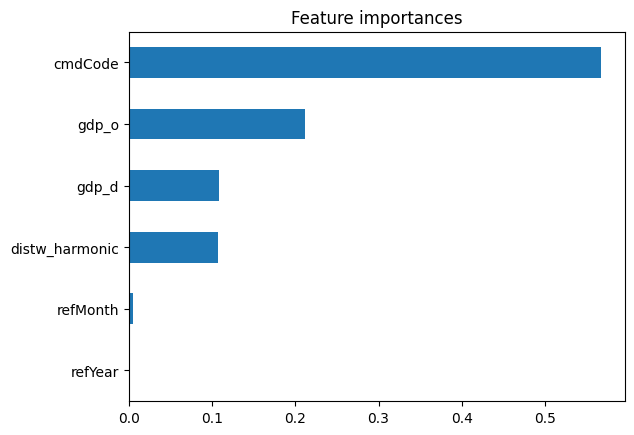

time: 1.88 s (started: 2023-07-07 16:43:33 +03:00)


In [6]:
# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()

In [7]:
#+density
X_test = data[data['refYear'] == 2019].sample(frac =.5)
y_test = X_test['primaryValue']
X_test = X_test[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density']]
print("X_val.shape: ", X_test.shape)

X_train = data[data['refYear'] != 2019]
# X_train = X_train[X_train['year'] != 2016] # just testing!
y_train = X_train['primaryValue']
X_train = X_train[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density']]
print("X_train.shape: ", X_train.shape)

# X = data[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode']]
# y = data['primaryValue']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
# del X, y


# RF
reg = model = RandomForestRegressor(min_samples_split=10,oob_score=True, n_estimators=25, n_jobs=-1, random_state=0, criterion='poisson', max_depth=17, verbose=2, max_features = 0.7)
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


r2_train = reg.score(X_train, y_train)
r2_val = reg.score(X_test, y_test)
print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2_val.round(2))
oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_val, y_pred)
adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print("Mean Squared Error:", mse.round(2))
print("Mean Absolute Error:", mae.round(2))
# print("R^2 Score:", r2.round(2))
print("Adjusted R^2 Score:", adj_r2.round(2))

index = y_test!=0
mape = MAPE(y_test[index], y_pred[index])
mpe = MPE(y_test[index], y_pred[index])


print('MAPE: ', mape)
print('MPE: ', mpe)

X_val.shape:  (6126878, 7)
X_train.shape:  (30866660, 7)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.


building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:  4.1min remaining:  8.7min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:  4.3min remaining:   49.6s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  4.4min finished
/export/home/chouno/python-installation/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    2.1s remaining:   24.7s
[Parallel(n_jobs=25)]: Done  15 out of  25 | elapsed:    2.4s remaining:    1.6s
[Parallel(n_jobs=25)]: Done  25 out of  25 | elapsed:    2.9s finished
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    3.5s remaining:   39.9s
[Parallel(n_jobs=25)]: Done  15 out of  25 | el

R2 on training data: 0.91
R2 on validation data: 0.43
OOB Score (R-squared): 0.88
Mean Squared Error: 80.48
Mean Absolute Error: 0.47
Adjusted R^2 Score: 0.43
MAPE:  299481.39744395623
MPE:  -299466.320713621
time: 6min 11s (started: 2023-07-07 16:43:34 +03:00)


Feature Importances:
 refYear           0.000
distw_harmonic    0.098
gdp_o             0.182
gdp_d             0.111
refMonth          0.003
cmdCode           0.404
density           0.202
dtype: float64


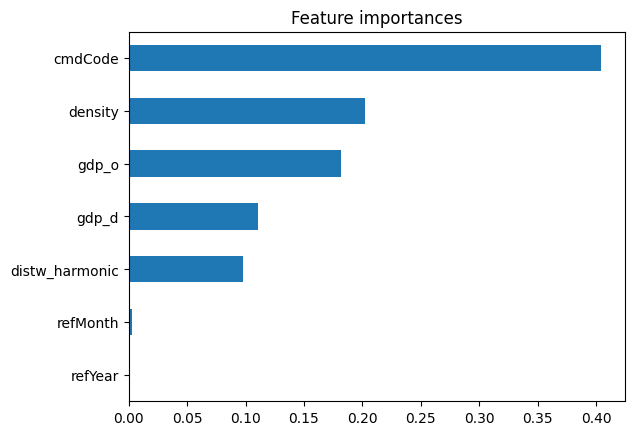

time: 253 ms (started: 2023-07-07 16:49:46 +03:00)


In [8]:
# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()

X_val.shape:  (6126878, 9)
X_train.shape:  (30866660, 9)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.


building tree 1 of 25building tree 2 of 25
building tree 3 of 25

building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:  2.9min remaining:  6.2min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:  3.3min remaining:   37.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.4min finished
/export/home/chouno/python-installation/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    4.6s remaining:   53.4s
[Parallel(n_jobs=25)]: Done  15 out of  25 | elapsed:    7.1s remaining:    4.8s
[Parallel(n_jobs=25)]: Done  25 out of  25 | elapsed:    8.4s finished
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    8.9s remaining:  1.7min
[Parallel(n_jobs=25)]: Done  15 out of  25 | el

R2 on training data: 0.92
R2 on validation data: 0.43
OOB Score (R-squared): 0.89
Mean Squared Error: 85.34
Mean Absolute Error: 0.41
Adjusted R^2 Score: 0.43
MAPE:  240216.6921046577
MPE:  -240201.23428781508
Feature Importances:
 refYear           0.000
distw_harmonic    0.084
gdp_o             0.152
gdp_d             0.086
refMonth          0.002
cmdCode           0.412
density           0.190
gdpcap_o          0.032
gdpcap_d          0.041
dtype: float64


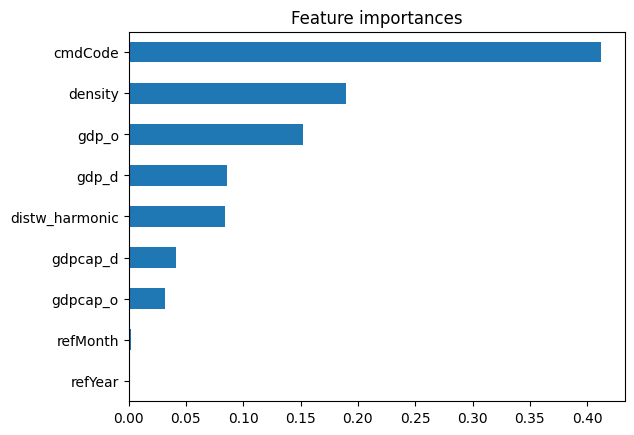

time: 6min (started: 2023-07-07 16:49:47 +03:00)


In [9]:
# +density+gdpcap

X_test = data[data['refYear'] == 2019].sample(frac =.5)
y_test = X_test['primaryValue']
X_test = X_test[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density','gdpcap_o','gdpcap_d']]
print("X_val.shape: ", X_test.shape)

X_train = data[data['refYear'] != 2019]
# X_train = X_train[X_train['year'] != 2016] # just testing!
y_train = X_train['primaryValue']
X_train = X_train[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density','gdpcap_o','gdpcap_d']]
print("X_train.shape: ", X_train.shape)

# X = data[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode']]
# y = data['primaryValue']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
# del X, y


# RF
reg = model = RandomForestRegressor(oob_score=True,min_samples_split=10, n_estimators=25, n_jobs=-1, random_state=0, criterion='poisson', max_depth=17, verbose=2, max_features = 0.7)
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


r2_train = reg.score(X_train, y_train)
r2_val = reg.score(X_test, y_test)
print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2_val.round(2))
oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_val, y_pred)
adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print("Mean Squared Error:", mse.round(2))
print("Mean Absolute Error:", mae.round(2))
# print("R^2 Score:", r2.round(2))
print("Adjusted R^2 Score:", adj_r2.round(2))

index = y_test!=0
mape = MAPE(y_test[index], y_pred[index])
mpe = MPE(y_test[index], y_pred[index])


print('MAPE: ', mape)
print('MPE: ', mpe)

# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()

X_val.shape:  (6126878, 10)
X_train.shape:  (30866660, 10)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.


building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 25 of 25
building tree 24 of 25


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:  7.6min remaining: 16.1min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:  7.9min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  8.0min finished
/export/home/chouno/python-installation/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    4.5s remaining:   51.3s
[Parallel(n_jobs=25)]: Done  15 out of  25 | elapsed:    5.9s remaining:    3.9s
[Parallel(n_jobs=25)]: Done  25 out of  25 | elapsed:    6.6s finished
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    8.6s remaining:  1.6min
[Parallel(n_jobs=25)]: Done  15 out of  25 | el

R2 on training data: 0.92
R2 on validation data: 0.27
OOB Score (R-squared): 0.89
Mean Squared Error: 94.66
Mean Absolute Error: 0.44
Adjusted R^2 Score: 0.27
MAPE:  272735.50175408047
MPE:  -272719.90368892695
Feature Importances:
 refYear           0.000
distw_harmonic    0.080
gdp_o             0.174
gdp_d             0.090
refMonth          0.001
cmdCode           0.276
pci               0.218
density           0.101
gdpcap_o          0.021
gdpcap_d          0.038
dtype: float64


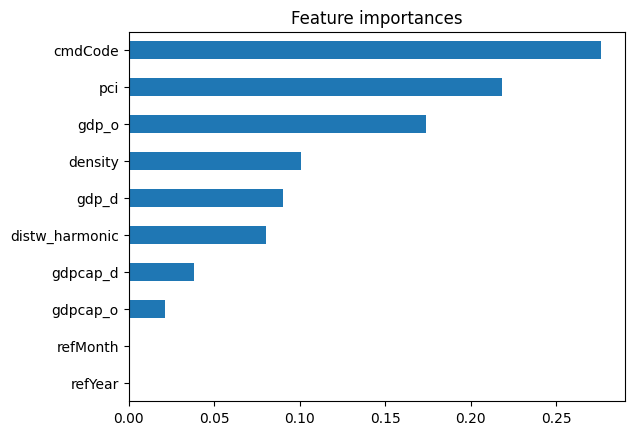

time: 11min 11s (started: 2023-07-07 16:55:47 +03:00)


In [10]:
# +density+gdpcap+pci

X_test = data[data['refYear'] == 2019].sample(frac =.5)
y_test = X_test['primaryValue']
X_test = X_test[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','pci','density','gdpcap_o','gdpcap_d']]
print("X_val.shape: ", X_test.shape)

X_train = data[data['refYear'] != 2019]
# X_train = X_train[X_train['year'] != 2016] # just testing!
y_train = X_train['primaryValue']
X_train = X_train[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','pci','density','gdpcap_o','gdpcap_d']]
print("X_train.shape: ", X_train.shape)

# X = data[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode']]
# y = data['primaryValue']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
# del X, y


# RF
reg = model = RandomForestRegressor(oob_score=True,min_samples_split=10, n_estimators=25, n_jobs=-1, random_state=0, criterion='poisson', max_depth=17, verbose=2, max_features = 0.7)
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


r2_train = reg.score(X_train, y_train)
r2_val = reg.score(X_test, y_test)
print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2_val.round(2))
oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_val, y_pred)
adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print("Mean Squared Error:", mse.round(2))
print("Mean Absolute Error:", mae.round(2))
# print("R^2 Score:", r2.round(2))
print("Adjusted R^2 Score:", adj_r2.round(2))

index = y_test!=0
mape = MAPE(y_test[index], y_pred[index])
mpe = MPE(y_test[index], y_pred[index])


print('MAPE: ', mape)
print('MPE: ', mpe)

# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()

X_val.shape:  (6126878, 9)
X_train.shape:  (30866660, 9)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.


building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:  4.4min remaining:  9.2min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:  4.5min remaining:   51.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  4.5min finished
/export/home/chouno/python-installation/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    2.0s remaining:   22.6s
[Parallel(n_jobs=25)]: Done  15 out of  25 | elapsed:    2.1s remaining:    1.4s
[Parallel(n_jobs=25)]: Done  25 out of  25 | elapsed:    2.7s finished
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    3.7s remaining:   43.0s
[Parallel(n_jobs=25)]: Done  15 out of  25 | el

R2 on training data: 0.92
R2 on validation data: 0.24
OOB Score (R-squared): 0.89
Mean Squared Error: 109.57
Mean Absolute Error: 0.45
Adjusted R^2 Score: 0.24
MAPE:  318903.2278187704
MPE:  -318887.70540263684
Feature Importances:
 distw_harmonic    0.081
gdp_o             0.164
gdp_d             0.090
refMonth          0.001
cmdCode           0.275
pci               0.212
density           0.116
gdpcap_o          0.022
gdpcap_d          0.040
dtype: float64


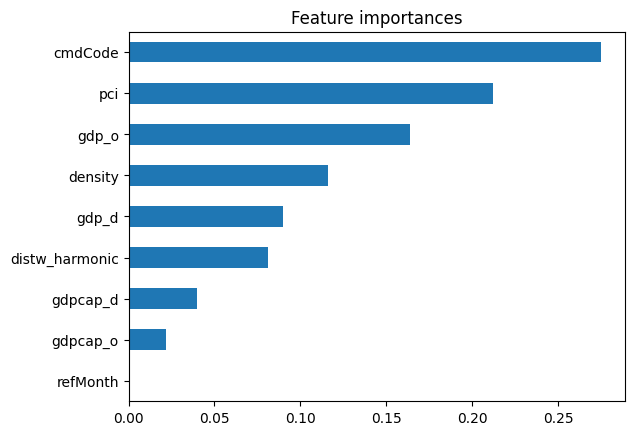

time: 6min 17s (started: 2023-07-07 17:06:59 +03:00)


In [11]:
# +density+gdpcap+pci + No year

X_test = data[data['refYear'] == 2019].sample(frac =.5)
y_test = X_test['primaryValue']
X_test = X_test[['distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','pci','density','gdpcap_o','gdpcap_d']]
print("X_val.shape: ", X_test.shape)

X_train = data[data['refYear'] != 2019]
# X_train = X_train[X_train['year'] != 2016] # just testing!
y_train = X_train['primaryValue']
X_train = X_train[[ 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','pci','density','gdpcap_o','gdpcap_d']]
print("X_train.shape: ", X_train.shape)

# X = data[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode']]
# y = data['primaryValue']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
# del X, y


# RF
reg = model = RandomForestRegressor(oob_score=True,min_samples_split=10, n_estimators=25, n_jobs=-1, random_state=0, criterion='poisson', max_depth=17, verbose=2, max_features = 0.7)
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


r2_train = reg.score(X_train, y_train)
r2_val = reg.score(X_test, y_test)
print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2_val.round(2))
oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_val, y_pred)
adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print("Mean Squared Error:", mse.round(2))
print("Mean Absolute Error:", mae.round(2))
# print("R^2 Score:", r2.round(2))
print("Adjusted R^2 Score:", adj_r2.round(2))

index = y_test!=0
mape = MAPE(y_test[index], y_pred[index])
mpe = MPE(y_test[index], y_pred[index])


print('MAPE: ', mape)
print('MPE: ', mpe)

# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()

# Log transformations

X_val.shape:  (6126878, 6)
X_train.shape:  (30866660, 6)


/export/home/chouno/python-installation/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.


building tree 1 of 25building tree 2 of 25
building tree 3 of 25

building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:  4.7min remaining:  9.9min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:  5.1min remaining:   58.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  5.3min finished
/export/home/chouno/python-installation/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    6.2s remaining:  1.2min
[Parallel(n_jobs=25)]: Done  15 out of  25 | elapsed:    7.8s remaining:    5.2s
[Parallel(n_jobs=25)]: Done  25 out of  25 | elapsed:    8.7s finished
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    5.8s remaining:  1.1min
[Parallel(n_jobs=25)]: Done  15 out of  25 | el

OOB Score (R-squared): 0.38
R2 on training data: 0.15
R2 on validation data: 0.15
MSE:  120.56
MAE:  0.33
R-square:  0.15
MAPE:  12172.87
MPE:  -12097.65
Feature Importances:
 refYear           0.000
distw_harmonic    0.118
gdp_o             0.317
gdp_d             0.213
refMonth          0.002
cmdCode           0.349
dtype: float64


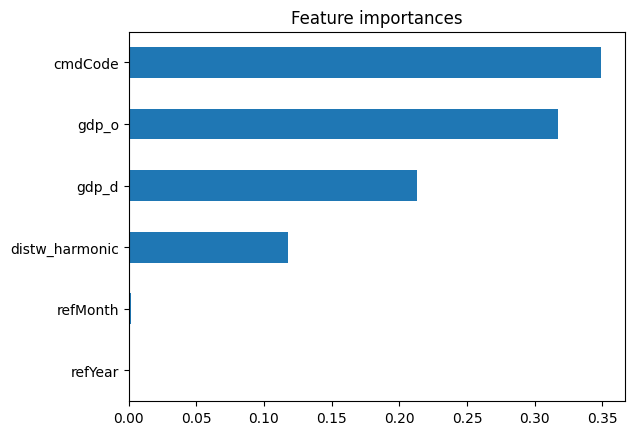

time: 8min 24s (started: 2023-07-07 17:13:16 +03:00)


In [12]:
X_test = data[data['refYear'] == 2019].sample(frac =.5)
y_test = X_test['primaryValue']
X_test = X_test[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode']]
print("X_val.shape: ", X_test.shape)

X_train = data[data['refYear'] != 2019]
# X_train = X_train[X_train['year'] != 2016] # just testing!
y_train = X_train['primaryValue']
X_train = X_train[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode']]
print("X_train.shape: ", X_train.shape)


X_train_log = X_train.copy()
y_train_log = np.log(y_train)
X_test_log = X_test.copy()
y_test_log = y_test

X_train_log['gdp_o'] = np.log(X_train_log['gdp_o'])
X_train_log['gdp_d'] = np.log(X_train_log['gdp_d'])
X_train_log['distw_harmonic'] = np.log(X_train_log['distw_harmonic'])

X_test_log['gdp_o'] = np.log(X_test_log['gdp_o'])
X_test_log['gdp_d'] = np.log(X_test_log['gdp_d'])
X_test_log['distw_harmonic'] = np.log(X_test_log['distw_harmonic'])

indices = y_train_log[y_train_log ==-np.inf].index
X_train_log = X_train_log.drop(indices)
y_train_log = y_train_log[y_train_log !=-np.inf]

# RF
reg = model = RandomForestRegressor(oob_score=True, min_samples_split=10, n_estimators=25, n_jobs=-1, random_state=0, max_depth=17, verbose=2)
reg = reg.fit(X_train_log, y_train_log)
y_pred = reg.predict(X_test_log)
y_pred_train = reg.predict(X_train_log)
y_pred = np.exp(y_pred)
y_pred_train = np.exp(y_pred_train)
y_train_log = np.exp(y_train_log)


mse = mean_squared_error(y_test_log,y_pred)
mae = mean_absolute_error(y_test_log,y_pred)
r2 = r2_score(y_test_log, y_pred)
r2_train = r2_score(y_train_log, y_pred_train)

index = y_test_log!=0
mape = MAPE(y_test_log[index], y_pred[index])
mpe = MPE(y_test_log[index], y_pred[index])

oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))

print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2.round(2))

print('MSE: ', mse.round(2))
print('MAE: ', mae.round(2))
print('R-square: ', r2.round(2))
print('MAPE: ', mape.round(2))
print('MPE: ', mpe.round(2))

# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()

X_val.shape:  (6126878, 7)
X_train.shape:  (30866660, 7)


/export/home/chouno/python-installation/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.


building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:  3.9min remaining:  8.3min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:  4.0min remaining:   45.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  4.0min finished
/export/home/chouno/python-installation/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    7.0s remaining:  1.3min
[Parallel(n_jobs=25)]: Done  15 out of  25 | elapsed:    8.2s remaining:    5.4s
[Parallel(n_jobs=25)]: Done  25 out of  25 | elapsed:    8.9s finished
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    9.7s remaining:  1.9min
[Parallel(n_jobs=25)]: Done  15 out of  25 | el

OOB Score (R-squared): 0.38
R2 on training data: 0.18
R2 on validation data: 0.21
MSE:  110.68
MAE:  0.35
R-square:  0.21
MAPE:  12950.56
MPE:  -12876.54
Feature Importances:
 refYear           0.000
distw_harmonic    0.110
gdp_o             0.305
gdp_d             0.209
refMonth          0.002
cmdCode           0.280
density           0.094
dtype: float64


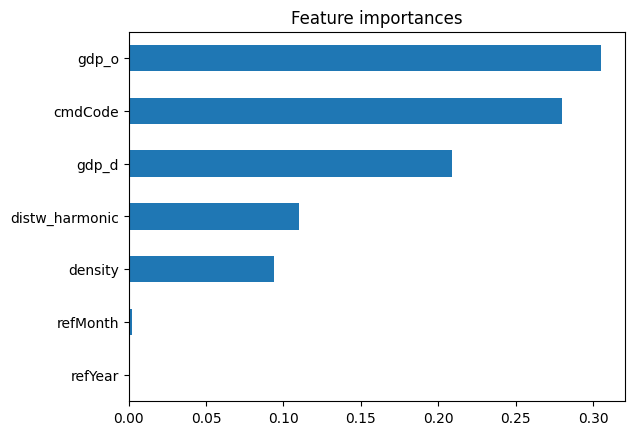

time: 8min (started: 2023-07-07 17:54:02 +03:00)


In [17]:
X_test = data[data['refYear'] == 2019].sample(frac =.5)
y_test = X_test['primaryValue']
X_test = X_test[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density']]
print("X_val.shape: ", X_test.shape)

X_train = data[data['refYear'] != 2019]
# X_train = X_train[X_train['year'] != 2016] # just testing!
y_train = X_train['primaryValue']
X_train = X_train[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density']]
print("X_train.shape: ", X_train.shape)

X_train_log = X_train.copy()
y_train_log = np.log(y_train)
X_test_log = X_test.copy()
y_test_log = y_test

X_train_log['gdp_o'] = np.log(X_train_log['gdp_o'])
X_train_log['gdp_d'] = np.log(X_train_log['gdp_d'])
X_train_log['distw_harmonic'] = np.log(X_train_log['distw_harmonic'])

X_test_log['gdp_o'] = np.log(X_test_log['gdp_o'])
X_test_log['gdp_d'] = np.log(X_test_log['gdp_d'])
X_test_log['distw_harmonic'] = np.log(X_test_log['distw_harmonic'])

indices = y_train_log[y_train_log ==-np.inf].index
X_train_log = X_train_log.drop(indices)
y_train_log = y_train_log[y_train_log !=-np.inf]

# RF
reg = model = RandomForestRegressor(oob_score=True,min_samples_split=10, n_estimators=25, n_jobs=-1, random_state=0, max_depth=17, verbose=2)
reg = reg.fit(X_train_log, y_train_log)
y_pred = reg.predict(X_test_log)
y_pred_train = reg.predict(X_train_log)
y_pred = np.exp(y_pred)
y_pred_train = np.exp(y_pred_train)
y_train_log = np.exp(y_train_log)


mse = mean_squared_error(y_test_log,y_pred)
mae = mean_absolute_error(y_test_log,y_pred)
r2 = r2_score(y_test_log, y_pred)
r2_train = r2_score(y_train_log, y_pred_train)

index = y_test_log!=0
mape = MAPE(y_test_log[index], y_pred[index])
mpe = MPE(y_test_log[index], y_pred[index])

oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))
print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2.round(2))

print('MSE: ', mse.round(2))
print('MAE: ', mae.round(2))
print('R-square: ', r2.round(2))
print('MAPE: ', mape.round(2))
print('MPE: ', mpe.round(2))
# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()


X_val.shape:  (6126878, 9)
X_train.shape:  (30866660, 9)


/export/home/chouno/python-installation/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.


building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25



[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:  7.7min remaining: 16.4min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:  8.5min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  8.6min finished
/export/home/chouno/python-installation/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    5.5s remaining:  1.1min
[Parallel(n_jobs=25)]: Done  15 out of  25 | elapsed:    6.7s remaining:    4.5s
[Parallel(n_jobs=25)]: Done  25 out of  25 | elapsed:    7.8s finished
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    8.6s remaining:  1.7min
[Parallel(n_jobs=25)]: Done  15 out of  25 | el

OOB Score (R-squared): 0.38
R2 on training data: 0.15
R2 on validation data: 0.11
MSE:  128.95
MAE:  0.35
R-square:  0.11
MAPE:  12435.93
MPE:  -12361.7
Feature Importances:
 refYear           0.000
distw_harmonic    0.093
gdp_o             0.212
gdp_d             0.187
refMonth          0.001
cmdCode           0.271
density           0.090
gdpcap_o          0.108
gdpcap_d          0.039
dtype: float64


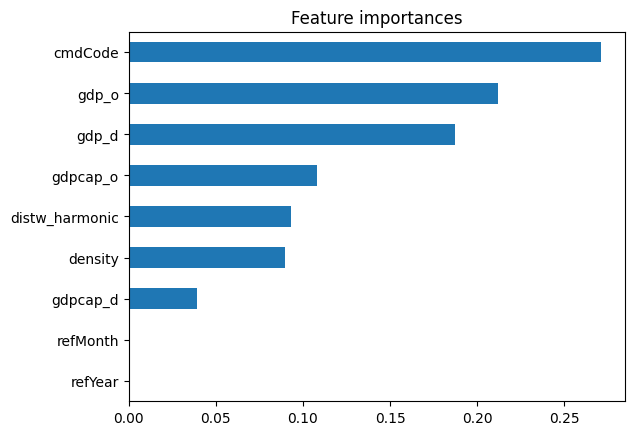

time: 12min 12s (started: 2023-07-07 18:02:02 +03:00)


In [18]:
X_test = data[data['refYear'] == 2019].sample(frac =.5)
y_test = X_test['primaryValue']
X_test = X_test[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density','gdpcap_o','gdpcap_d']]
print("X_val.shape: ", X_test.shape)

X_train = data[data['refYear'] != 2019]
# X_train = X_train[X_train['year'] != 2016] # just testing!
y_train = X_train['primaryValue']
X_train = X_train[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density','gdpcap_o','gdpcap_d']]
print("X_train.shape: ", X_train.shape)


X_train_log = X_train.copy()
y_train_log = np.log(y_train)
X_test_log = X_test.copy()
y_test_log = y_test

X_train_log['gdp_o'] = np.log(X_train_log['gdp_o'])
X_train_log['gdp_d'] = np.log(X_train_log['gdp_d'])
X_train_log['distw_harmonic'] = np.log(X_train_log['distw_harmonic'])

X_test_log['gdp_o'] = np.log(X_test_log['gdp_o'])
X_test_log['gdp_d'] = np.log(X_test_log['gdp_d'])
X_test_log['distw_harmonic'] = np.log(X_test_log['distw_harmonic'])

indices = y_train_log[y_train_log ==-np.inf].index
X_train_log = X_train_log.drop(indices)
y_train_log = y_train_log[y_train_log !=-np.inf]

# RF
reg = model = RandomForestRegressor(oob_score=True,min_samples_split=10, n_estimators=25, n_jobs=-1, random_state=0, max_depth=17, verbose=2)
reg = reg.fit(X_train_log, y_train_log)
y_pred = reg.predict(X_test_log)
y_pred_train = reg.predict(X_train_log)
y_pred = np.exp(y_pred)
y_pred_train = np.exp(y_pred_train)
y_train_log = np.exp(y_train_log)


mse = mean_squared_error(y_test_log,y_pred)
mae = mean_absolute_error(y_test_log,y_pred)
r2 = r2_score(y_test_log, y_pred)
r2_train = r2_score(y_train_log, y_pred_train)

index = y_test_log!=0
mape = MAPE(y_test_log[index], y_pred[index])
mpe = MPE(y_test_log[index], y_pred[index])

oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))
print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2.round(2))

print('MSE: ', mse.round(2))
print('MAE: ', mae.round(2))
print('R-square: ', r2.round(2))
print('MAPE: ', mape.round(2))
print('MPE: ', mpe.round(2))
# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()

X_val.shape:  (6126878, 10)
X_train.shape:  (30866660, 10)


/export/home/chouno/python-installation/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.


building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:  3.9min remaining:  8.4min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:  4.2min remaining:   48.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  4.4min finished
/export/home/chouno/python-installation/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    1.7s remaining:   19.8s
[Parallel(n_jobs=25)]: Done  15 out of  25 | elapsed:    2.0s remaining:    1.3s
[Parallel(n_jobs=25)]: Done  25 out of  25 | elapsed:    2.3s finished
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    3.0s remaining:   34.3s
[Parallel(n_jobs=25)]: Done  15 out of  25 | el

OOB Score (R-squared): 0.39
R2 on training data: 0.24
R2 on validation data: 0.06
MSE:  144.41
MAE:  0.36
R-square:  0.06
MAPE:  13596.83
MPE:  -13522.09
Feature Importances:
 refYear           0.000
distw_harmonic    0.090
gdp_o             0.209
gdp_d             0.184
refMonth          0.001
cmdCode           0.221
density           0.078
gdpcap_o          0.105
gdpcap_d          0.038
pci               0.072
dtype: float64


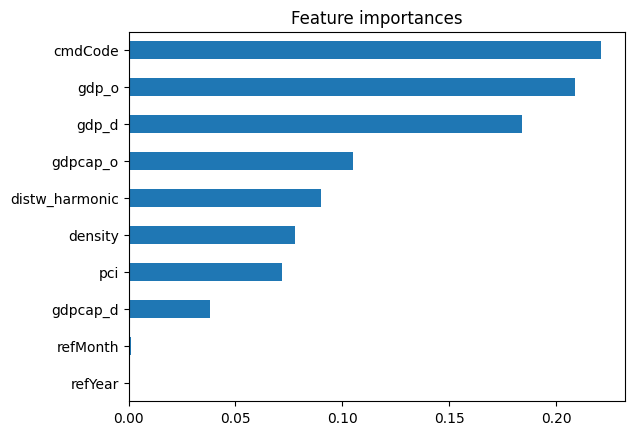

time: 6min 32s (started: 2023-07-07 18:14:15 +03:00)


In [19]:
X_test = data[data['refYear'] == 2019].sample(frac =.5)
y_test = X_test['primaryValue']
X_test = X_test[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density','gdpcap_o','gdpcap_d','pci']]
print("X_val.shape: ", X_test.shape)

X_train = data[data['refYear'] != 2019]
# X_train = X_train[X_train['year'] != 2016] # just testing!
y_train = X_train['primaryValue']
X_train = X_train[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density','gdpcap_o','gdpcap_d','pci']]
print("X_train.shape: ", X_train.shape)


X_train_log = X_train.copy()
y_train_log = np.log(y_train)
X_test_log = X_test.copy()
y_test_log = y_test

X_train_log['gdp_o'] = np.log(X_train_log['gdp_o'])
X_train_log['gdp_d'] = np.log(X_train_log['gdp_d'])
X_train_log['distw_harmonic'] = np.log(X_train_log['distw_harmonic'])

X_test_log['gdp_o'] = np.log(X_test_log['gdp_o'])
X_test_log['gdp_d'] = np.log(X_test_log['gdp_d'])
X_test_log['distw_harmonic'] = np.log(X_test_log['distw_harmonic'])

indices = y_train_log[y_train_log ==-np.inf].index
X_train_log = X_train_log.drop(indices)
y_train_log = y_train_log[y_train_log !=-np.inf]

# RF
reg = model = RandomForestRegressor(oob_score=True,min_samples_split=10, n_estimators=25, n_jobs=-1, random_state=0, max_depth=17, verbose=2)
reg = reg.fit(X_train_log, y_train_log)
y_pred = reg.predict(X_test_log)
y_pred_train = reg.predict(X_train_log)
y_pred = np.exp(y_pred)
y_pred_train = np.exp(y_pred_train)
y_train_log = np.exp(y_train_log)


mse = mean_squared_error(y_test_log,y_pred)
mae = mean_absolute_error(y_test_log,y_pred)
r2 = r2_score(y_test_log, y_pred)
r2_train = r2_score(y_train_log, y_pred_train)

index = y_test_log!=0
mape = MAPE(y_test_log[index], y_pred[index])
mpe = MPE(y_test_log[index], y_pred[index])

oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))
print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2.round(2))

print('MSE: ', mse.round(2))
print('MAE: ', mae.round(2))
print('R-square: ', r2.round(2))
print('MAPE: ', mape.round(2))
print('MPE: ', mpe.round(2))
# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()